# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether soemthing is one thing or another (there can be multiple things as the options)

Note: Use book version for more info!

## 1.  Make classification data and get it ready


In [260]:
import sklearn

In [261]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
                    

In [262]:
len(X), len(y)

(1000, 1000)

In [263]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [264]:
y  # only 0's and 1's

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [265]:
# make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


1    500
0    500
Name: label, dtype: int64

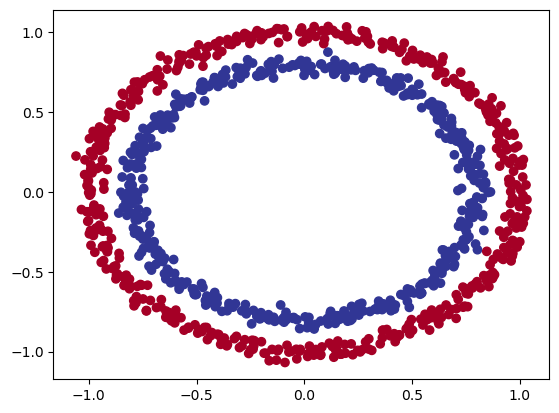

In [266]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
circles.label.value_counts()

**Note:** the data we're working with is oftern referred to as a toy dataset, a dataset that is small enough to experiment and learn but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [267]:
X.shape, y.shape

((1000, 2), (1000,))

In [268]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [269]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one saples of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one saples of X: (2,) and the same for y: ()


## 1.2 Turn data into tensors and create train and test splits

In [270]:
# Turn data into tensors
import torch
torch.__version__

'1.13.1'

In [271]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [272]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [273]:
X.type, y.type

(<function Tensor.type>, <function Tensor.type>)

In [274]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [275]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.3 = 20 percent of data wil be test and 80 percent will be train)
                                                    random_state=42) # similar to torch.manual_seed

In [276]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [277]:
n_samples

1000

## 2.  Building a model

Let's build a model to classify our blue and red dots.

to do so, we want to:
1. Setup device agnostic code so our code will run on a GPU accelerator if there is one!
2. Contruct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [278]:
# Import PyTorch and nn
import torch
from torch import nn
#Make device agnostic code
device  = "cude" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [279]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we have setup device agnostic code, let's create  model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that woutlines the forward pass (or forward computation) of our model
4. Instantiate and instace of our model class and sent it to the target device


In [280]:
# 1. Construct a model that sublcasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 values
        self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previous layer and outputs a single feature (same shape as y)

        """
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)
            ).to(device)
        """

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x))  #x -> layer_1 -> layer2 -> output
    
#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [281]:
device

'cpu'

In [282]:
next(model_0.parameters()).device

device(type='cpu')

In [283]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

#Sublclassing is usually useful because complex systems are easier to see
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [284]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [285]:
# Make predicitons 
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predicitons: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predicitons: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [286]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Setup loss function and optimizer

Which loss fucntion or optimizer should you use?

Again... this is problem specific.

For example: 
- MAE or MSE for regressions
- BCE or CCC (cross entropy) for classification

As a reminder, the loss function measures how *wrong* your model's predictions are.
And for optimizers, two of the most common and useful are SGD and Adam, however there are many options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy is, check out article on towards data science.com

* For different optimizers see `torch.optim`



In [287]:
# Setup the loss function

#loss_fn = nn.BCELoss() # Requires inputs to have fone through sigmoid avtication function prior to inputing it into BCE
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


In [288]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [289]:
# Calculate accuracy - out of 100 examples what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train Model
To train our model we're going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step(gradient descent)


### 3.1 Going from raw logits -> prediction probabilites - > prediction lables

Out model outputs are going to be raw **logits.**
We can concert these **logits** into prediction probablitlites by passing them to some kind of actiavation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [290]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits

tensor([[-3.3758e-02],
        [-3.0925e-02],
        [ 8.9392e-02],
        [-6.9192e-02],
        [ 2.9666e-01],
        [ 2.9679e-01],
        [ 1.4048e-01],
        [ 2.1776e-01],
        [ 8.0462e-02],
        [-2.8445e-02],
        [-6.2729e-02],
        [-2.0969e-02],
        [ 1.8467e-01],
        [ 1.4663e-01],
        [ 5.2323e-02],
        [ 2.3198e-01],
        [ 6.0201e-02],
        [-7.7123e-02],
        [-3.4853e-02],
        [-5.4889e-02],
        [-3.5730e-02],
        [ 2.8576e-01],
        [-2.8305e-02],
        [-8.1063e-02],
        [ 8.1167e-02],
        [ 1.7573e-01],
        [ 2.5394e-01],
        [ 3.1677e-01],
        [ 4.1465e-02],
        [ 1.7662e-01],
        [ 1.2237e-01],
        [ 6.4855e-02],
        [-6.5519e-02],
        [ 2.6689e-01],
        [-7.7007e-02],
        [ 1.1215e-02],
        [-4.3663e-02],
        [ 1.2971e-01],
        [ 2.4701e-01],
        [ 1.6160e-01],
        [-2.9177e-02],
        [ 4.7937e-02],
        [ 6.6640e-02],
        [ 3

In [291]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [292]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilites
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736],
        [0.5737],
        [0.5351],
        [0.5542],
        [0.5201],
        [0.4929],
        [0.4843],
        [0.4948],
        [0.5460],
        [0.5366],
        [0.5131],
        [0.5577],
        [0.5150],
        [0.4807],
        [0.4913],
        [0.4863],
        [0.4911],
        [0.5710],
        [0.4929],
        [0.4797],
        [0.5203],
        [0.5438],
        [0.5631],
        [0.5785],
        [0.5104],
        [0.5440],
        [0.5306],
        [0.5162],
        [0.4836],
        [0.5663],
        [0.4808],
        [0.5028],
        [0.4891],
        [0.5324],
        [0.5614],
        [0.5403],
        [0.4927],
        [0.5120],
        [0.5167],
        [0.5799],
        [0.4812],
        [0.5047],
        [0.5793],
        [0.4887],
        [0.5025],
        [0.5736],
        [0.4828],
        [0.4803],
        [0.5744],
        [0.5779],
        [0.5426],
        [0

In [293]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
      

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_prob` < 0.5, `y=0` (class 0)

In [294]:
# Find the predicted labels 
y_preds = torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.])

## 3.2 Building a training and testing loop

In [295]:
device

'cpu'

In [296]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train, = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build Training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits),  # nn. BCELoss exprects prediction probabilites as input
                   y_train)
    loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward (backpropagation)
    loss.backward()

    #5. Optimizer step (gradient descent)
    optimizer.step()


    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the test loss/axx
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=y_pred[:len(y_test)])
        
        #Print out what is happening
        if epoch % 10 == 0:
        
            print(f"EpochL {epoch} | Loss: {loss:.5f}, Acc{acc:2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc: .2f}%")
        

EpochL 0 | Loss: 0.69796, Acc51.875000% | Test loss:  0.69460, Test acc:  54.50%
EpochL 10 | Loss: 0.69768, Acc52.000000% | Test loss:  0.69438, Test acc:  54.00%
EpochL 20 | Loss: 0.69742, Acc52.000000% | Test loss:  0.69418, Test acc:  54.50%
EpochL 30 | Loss: 0.69717, Acc52.000000% | Test loss:  0.69401, Test acc:  55.00%
EpochL 40 | Loss: 0.69695, Acc51.625000% | Test loss:  0.69385, Test acc:  55.50%
EpochL 50 | Loss: 0.69675, Acc51.375000% | Test loss:  0.69370, Test acc:  55.00%
EpochL 60 | Loss: 0.69656, Acc51.375000% | Test loss:  0.69357, Test acc:  56.00%
EpochL 70 | Loss: 0.69638, Acc51.375000% | Test loss:  0.69345, Test acc:  55.50%
EpochL 80 | Loss: 0.69621, Acc51.250000% | Test loss:  0.69334, Test acc:  55.50%
EpochL 90 | Loss: 0.69606, Acc51.375000% | Test loss:  0.69324, Test acc:  55.50%
EpochL 100 | Loss: 0.69592, Acc51.125000% | Test loss:  0.69315, Test acc:  55.00%
EpochL 110 | Loss: 0.69579, Acc51.000000% | Test loss:  0.69306, Test acc:  55.00%
EpochL 120 | Lo

## 4. Make predictions and evaluate the model

From the metric it looks like our model isn't learning anything ...

So to inspect ir let's make some predictions and make them visual!

In other words, "Visualize, visualize, visualize!"

To do so, we are going to import a function called `plot_decision_boundary()`


In [297]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo (if it is not already downloaded)
if(Path("helper_functions.py").is_file()):
    print("helper functions exists!")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper functions exists!


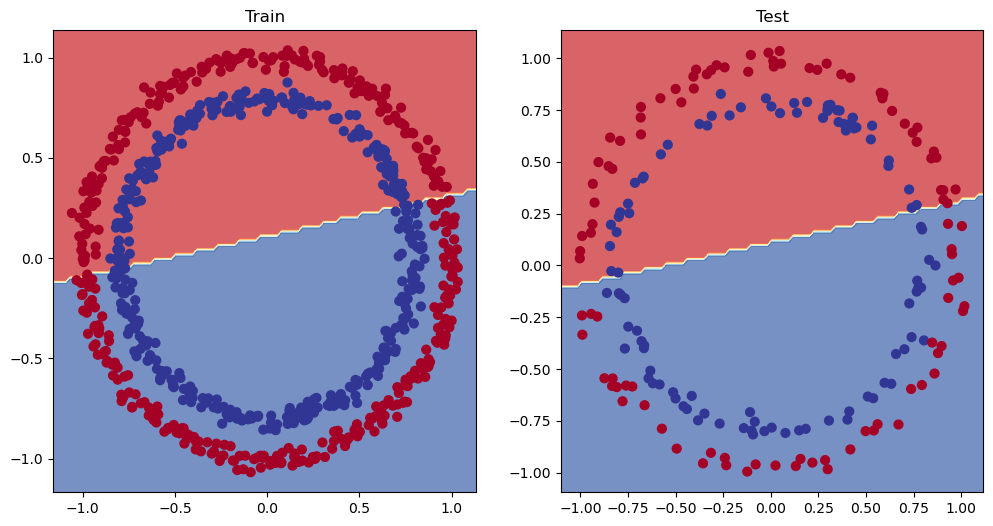

In [298]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspecctive)

* Add more layers - give the mode more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparamters**

In [299]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4611, -0.5188],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2212,  0.4274])),
             ('1.weight',
              tensor([[ 0.0742,  0.2409,  0.0223, -0.1076,  0.1962]])),
             ('1.bias', tensor([-0.1888]))])

Let's try and improve the model by:
* Adding more hidden units: 5 _> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

Typically, one one chage each param individually

In [300]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [301]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        #z = self.layer_1(x)
        #z = self.layer_2(z)
        #z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverahes speed ups wher possible behind the scenes
    
model_1 = CircleModelV1().to(device)
model_1
    


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [302]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.001)

In [303]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Setup device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Training & eval loop
for epoch in range(epochs):
    ### Training
    model_1.train()

    #1. Forward Pass
    y_logits = model_1(X_train).squeeze() # squeeze to get rid of extra dimension brackets on tensor
    t_pred = torch.round(torch.sigmoid(y_logits))  #logits -> rounded prediction

    #2. Calculate loss and accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Backpropagation
    loss.backward()
    #5. Optimizer Step
    optimizer.step()

    ### Testing 
    model_1.eval()
    with torch.inference_mode():
        #1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. Calculate test loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test[:len(test_logits)])
        test_acc = accuracy_fn(y_true=y_test[:len(test_logits)],
                               y_pred=test_pred)
        #Print out what is happening
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69395, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 20 | Loss: 0.69395, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 30 | Loss: 0.69394, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 40 | Loss: 0.69394, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 50 | Loss: 0.69394, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 60 | Loss: 0.69394, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 70 | Loss: 0.69393, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 80 | Loss: 0.69393, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 90 | Loss: 0.69393, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69392, Accuracy: 49.62% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 110 | Loss: 0.69392, Accuracy: 49.62% | Test loss: 0.69262, Test acc: 51.00%
Epo

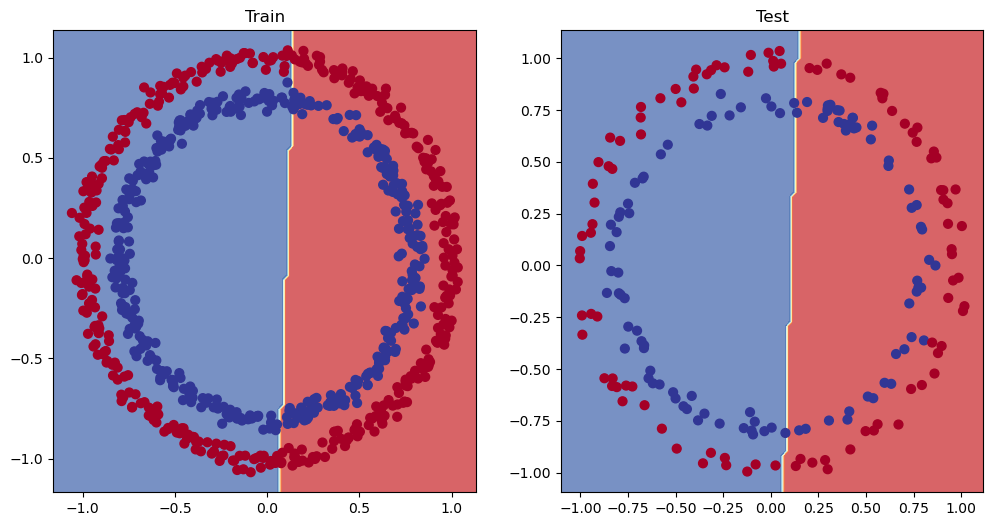

In [304]:
#Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem it to test out a smaller problem

In [305]:
# Create soem data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression (without epsilon though)

#Check data (sanity check)
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [306]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

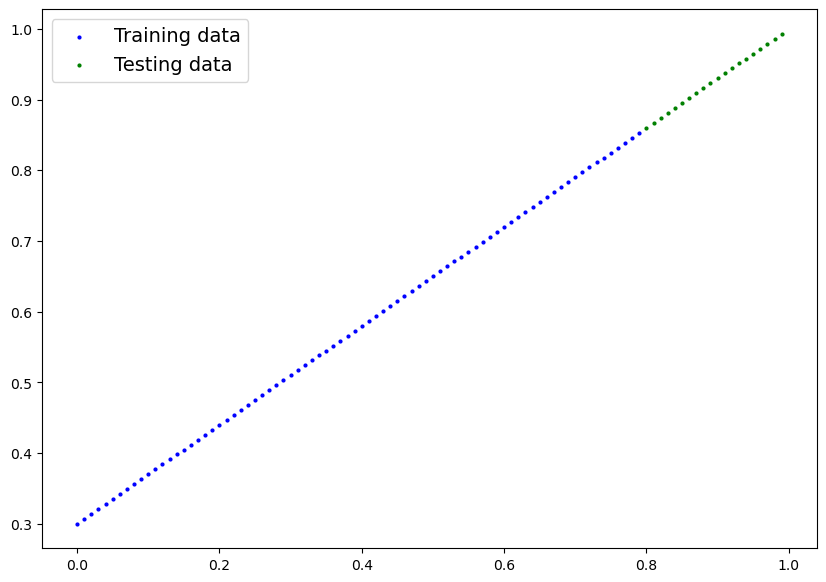

In [307]:
plot_predictions(train_data=X_train_regression, 
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [308]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line


In [309]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [310]:
#Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [311]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Set number of epochs
epochs = 1000

#Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training 
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Testing 
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    #Print out what is happing
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


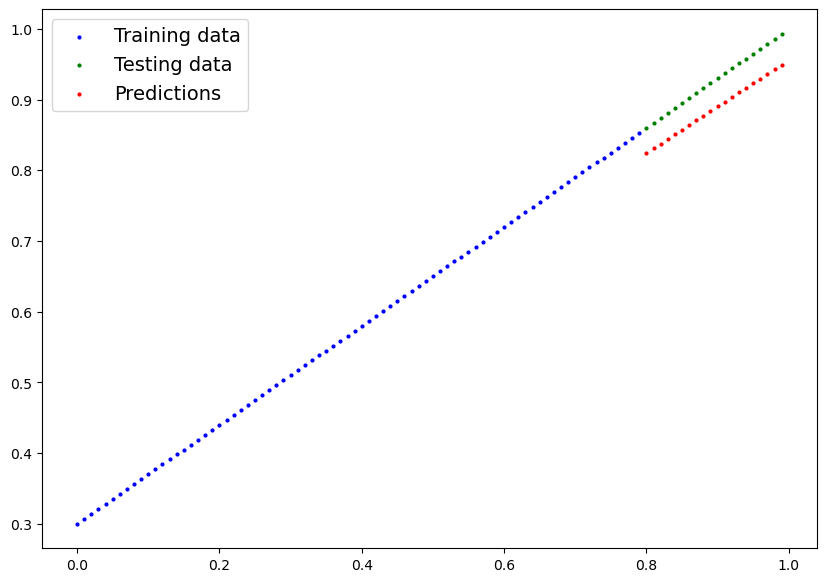

In [312]:
# Turn on evaluation mode
model_2.eval()

#Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

#plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite set of Linear and non-Linear functions?


### 6.1 Recreatinf non-linear data (red and blue circles)


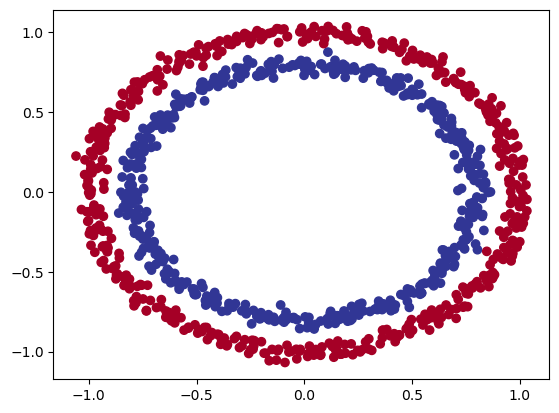

In [313]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [314]:
# Convert data to tensors and tehn to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model wiht non-linearity

* Linear = straight lines
* Non-linear = non-straight

Artificial Neural networks are a large comvination of linear and non-linear functions which are able to potentially find patterns in data.

In [315]:
# Build a model with no-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # ReLU is a non-linear activation function

    def forward(self, x):
        #Where should our non-linear activation function go?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [321]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                            lr=0.001)

### 6.3 Training a model with non-linearity

In [322]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()

    #1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    #2. loss 
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    #3. Optmizer zero grad
    optimizer.zero_grad()
    #4. Loss backward (backpropagation)
    loss.backward()
    #5. Step the optimizer
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        #Print out what is happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.00048, Accuracy: 100.00% | Test Loss: 0.00542, Test Accuracy: 100.00%
Epoch: 100 | Loss: 0.00032, Accuracy: 100.00% | Test Loss: 0.00445, Test Accuracy: 100.00%
Epoch: 200 | Loss: 0.00023, Accuracy: 100.00% | Test Loss: 0.00370, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.00017, Accuracy: 100.00% | Test Loss: 0.00339, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.00013, Accuracy: 100.00% | Test Loss: 0.00315, Test Accuracy: 100.00%
Epoch: 500 | Loss: 0.00011, Accuracy: 100.00% | Test Loss: 0.00296, Test Accuracy: 100.00%
Epoch: 600 | Loss: 0.00009, Accuracy: 100.00% | Test Loss: 0.00280, Test Accuracy: 100.00%
Epoch: 700 | Loss: 0.00007, Accuracy: 100.00% | Test Loss: 0.00267, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.00006, Accuracy: 100.00% | Test Loss: 0.00255, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.00005, Accuracy: 100.00% | Test Loss: 0.00243, Test Accuracy: 100.00%


In [323]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 1.1372,  2.4354],
                      [-1.8396,  2.0922],
                      [-0.1549,  0.1427],
                      [-3.0044, -0.7416],
                      [ 0.0566, -3.1340],
                      [ 2.4382,  0.2687],
                      [ 2.2845, -1.1449],
                      [ 0.3410, -0.0998],
                      [ 0.5387,  1.9001],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-1.9718, -1.6640, -0.2872, -1.3455, -1.5742, -1.3672, -1.5049, -0.4252,
                      -0.3073, -0.6984])),
             ('layer_2.weight',
              tensor([[-1.6761, -2.0431,  0.2441, -1.5243, -1.8882, -1.4080, -1.5953,  0.2555,
                       -0.4794, -0.0997],
                      [ 1.9297,  1.9633,  0.1331,  2.4717,  2.4779,  1.9992,  2.2008,  0.0566,
                        1.9022, -0.1927],
                      [-0.3695, -0.2057, -0.2426,  0.1758,  0.0320,  0.0

In [324]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

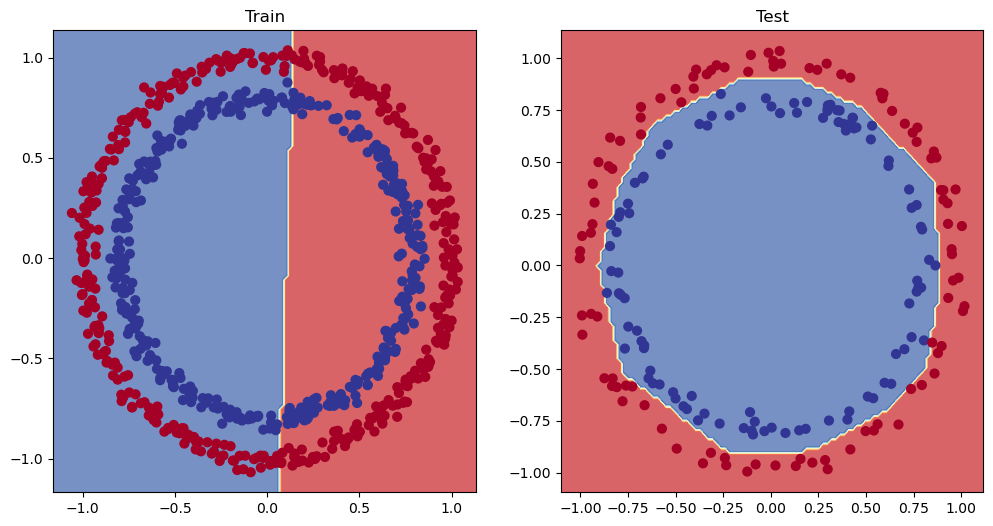

In [325]:
#Plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # non-linearity


## 7. Replicating non-linear activation functions

Nerual Netowrks, rather than us telling the model what to learn, we give it the tools to discover the patterns in data on its own.

And, these tools are linear and non-linear functions


In [327]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

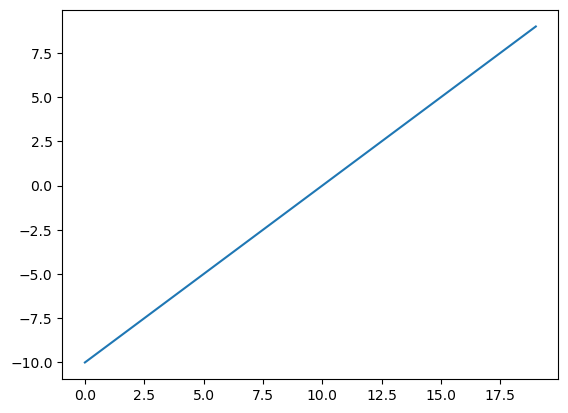

In [330]:
# Visualize the tensor
plt.plot(A)

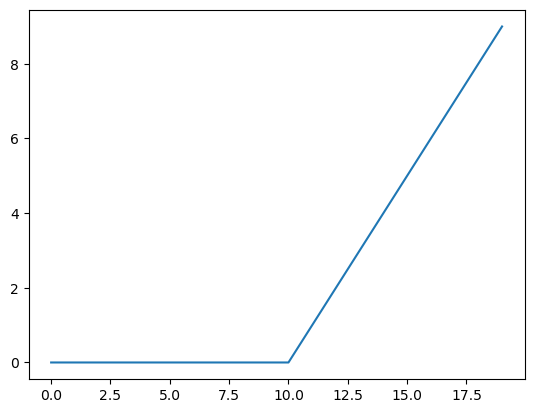

In [332]:
plt.plot(torch.relu(A))

In [335]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors!

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

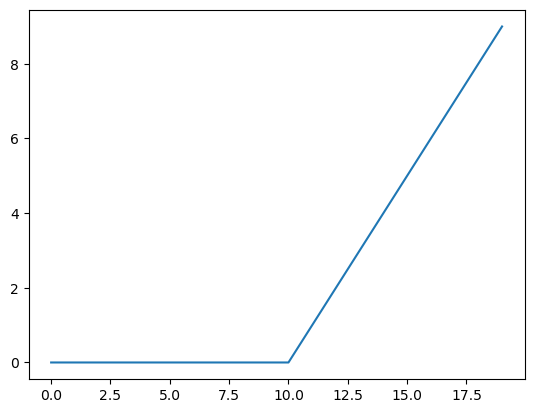

In [336]:
#Plot ReLU activation function
plt.plot(relu(A))

In [337]:
# Now let's do sigmoid
def sigmoid(x):
    return 1/ (1+ torch.exp(-x))

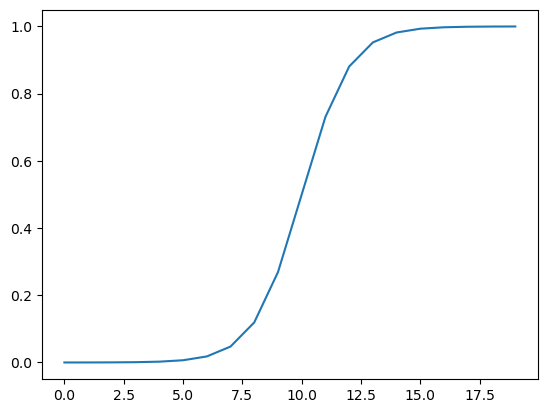

In [338]:
plt.plot(torch.sigmoid(A))  # torch function

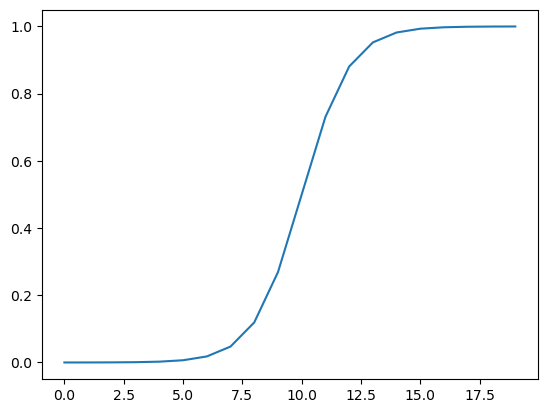

In [340]:
plt.plot(sigmoid(A)) # manual sigmoid (mathematically the same)

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another
* Multiclass classification = more than one thing or another

### Creating a toy multi-class dataset


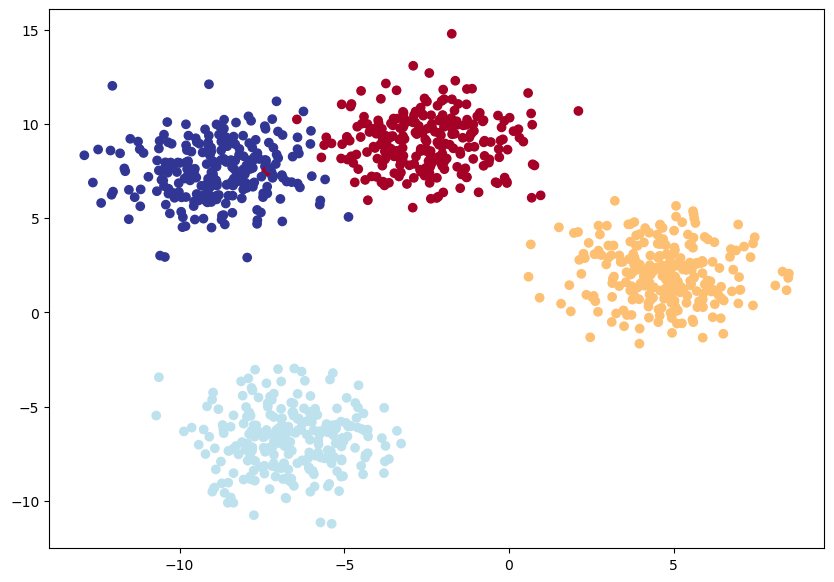

In [391]:
# import dependancies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Creat multicalss data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, # give the clusters a bit of shake up
                           random_state=RANDOM_SEED)
#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#3. SPlit into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                          y_blob,
                                                          test_size=0.2,
                                                          random_state=RANDOM_SEED)

#4. Plot data (visualize, visualzie, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap = plt.cm.RdYlBu)


### 8.2 Building a multi-class classification model in PyTorch


In [392]:
#Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [393]:
# Build a multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (Number of output classes)
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:        
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
    
#Create an instance of BlobModel on target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [394]:
X_blob_train.shape, y_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 0., 0., 1.]))

In [395]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [396]:
#Create a loss function for multi-class
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.01)

### 8.4 Getting prediction probabilites for a multi-class PyTorch Model

In order to evaluate an dtrain and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then process those into their proper labels/

In [397]:
# Get raw output of model
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1044e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2928e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

In [398]:
#Convert our model's logit outputs to prediction probabilites
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [399]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [400]:
torch.argmax(y_pred_probs[0]) # return class that it thinks is correct

tensor(1)

In [401]:
#Convert our model's probabilites to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [402]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model


In [444]:
# Fit multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
    ### Training
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    ### Testing 
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_pred)
    # Print out what is happening at certain epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.02477, Acc: 99.25% | Test Loss: 0.01404, Test Acc: 99.50%
Epoch: 10 | Loss: 0.02477, Acc: 99.25% | Test Loss: 0.01403, Test Acc: 99.50%
Epoch: 20 | Loss: 0.02476, Acc: 99.25% | Test Loss: 0.01402, Test Acc: 99.50%
Epoch: 30 | Loss: 0.02475, Acc: 99.25% | Test Loss: 0.01401, Test Acc: 99.50%
Epoch: 40 | Loss: 0.02474, Acc: 99.25% | Test Loss: 0.01399, Test Acc: 99.50%
Epoch: 50 | Loss: 0.02473, Acc: 99.25% | Test Loss: 0.01398, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02473, Acc: 99.25% | Test Loss: 0.01397, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02472, Acc: 99.25% | Test Loss: 0.01396, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02471, Acc: 99.25% | Test Loss: 0.01395, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02470, Acc: 99.25% | Test Loss: 0.01394, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model


In [445]:
#Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

#View the first 10 predictions
y_logits[:10]

tensor([[ -1.2124,   8.5000,  -9.2405, -10.2851],
        [ -2.4746,  -7.8908,  -5.0310,   4.4469],
        [ -4.6426,  -5.0581,   4.4875,  -3.6004],
        [ -1.8878,   6.1250,  -4.8462,  -5.9457],
        [  5.4619,  -1.7432, -10.9864,  -8.3968],
        [ -3.1522,  -9.3675,  -5.8676,   5.3510],
        [ -4.0952,  -4.3344,   3.9306,  -2.9826],
        [  4.8866,  -5.3358,  -8.4245,  -4.2245],
        [ -5.9140,  -6.4667,   5.5106,  -4.6272],
        [  5.1348,  -3.9960,  -9.1339,  -5.6109]])

In [446]:
# go from logits -> prediction probabailites
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[6.0524e-05, 9.9994e-01, 1.9740e-08, 6.9450e-09],
        [9.8530e-04, 4.3786e-06, 7.6441e-05, 9.9893e-01],
        [1.0830e-04, 7.1477e-05, 9.9951e-01, 3.0707e-04],
        [3.3106e-04, 9.9965e-01, 1.7183e-05, 5.7228e-06],
        [9.9926e-01, 7.4218e-04, 7.1824e-08, 9.5694e-07],
        [2.0278e-04, 4.0529e-07, 1.3420e-05, 9.9978e-01],
        [3.2640e-04, 2.5694e-04, 9.9842e-01, 9.9293e-04],
        [9.9985e-01, 3.6341e-05, 1.6558e-06, 1.1041e-04],
        [1.0923e-05, 6.2846e-06, 9.9994e-01, 3.9552e-05],
        [9.9987e-01, 1.0827e-04, 6.3549e-07, 2.1534e-05]])

In [447]:
# Go from pred probs -> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

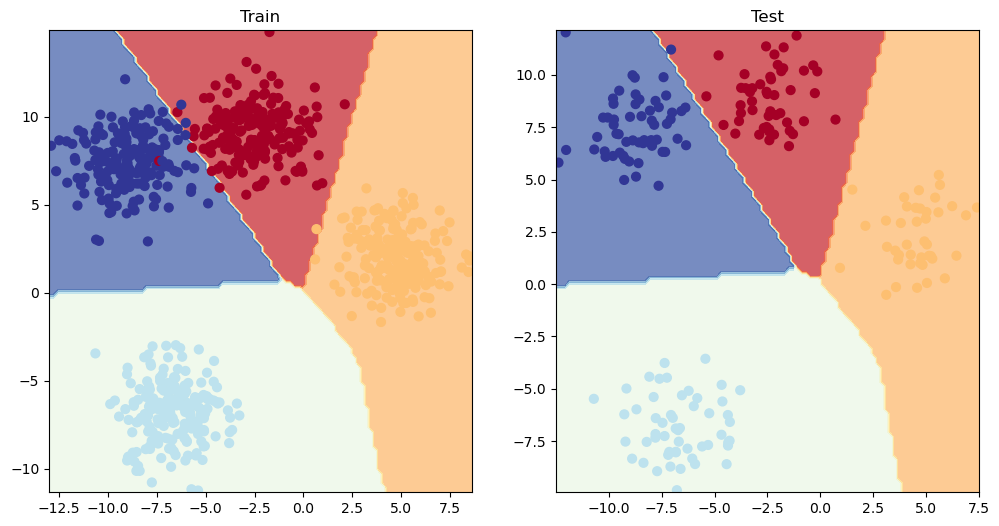

In [448]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics... (to evaluate our classification model)
* Accuracy - out of 100 samples, how many does it get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

In [461]:
from torchmetrics import Accuracy